# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [54]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw
import numpy as np
import pandas as pd

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above. (recovery does not confer lifelong immunity, and individuals may become susceptible again.)

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

1. Since the differential equations describe the dynamics in the compartments, we need two equations. 
2. The equations in the case of the SIS model are 
$$\frac{dS}{dt} = -\beta SI + \gamma I$$
$$\frac{dI}{dt} = \beta SI - \gamma I$$
3. $\beta$ is the proportion of susceptibles that becomes infectious and $\gamma$ is the proportion of infectious that will become susceptible. Essentially, $\beta$ and $\gamma$ determine how much time one will spend in the respectible compartment. If $\gamma$ is large, the time in the infectious compartment will be short. The number of infectious people will be low relative to the case with a medium sized $\gamma$. The opposite will be the case for a small $\gamma$. The reasoning for the interpretation of $\beta$ is similar.  

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

The differential equations for the SIRS model are 

$$\frac{dS}{dt} = -\beta SI + \theta R$$
$$\frac{dI}{dt} = \beta SI - \gamma I$$
$$\frac{dR}{dt} = \gamma I - \theta R$$

where R is the compartment for the recovered and $\theta$ is the rate at which the recovered lose their immunity.

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **strategy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

1. 
* Strategy A: Around 80% 
* Strategy B: Around 18%
* Strategy C: Around 55%

2. Strategy is using a the networks structure. By randomly targeting neighbors, strategy C has a higher chance to disable hubs and stop the spread of the disease.
3. This is due to the generation process of the BA network that we have discussed before. The pressence of hubs in the ER is unlikely.  


> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

I choose the explorable discussing herd immunity. Using a SIS model, it shows that once a person acquires immunity via a vaccine, the disease will not be spread via this person. To gain herd immunity and erradicate the spread of the disease, a critical threshold of vaccinated has to be passed. This is most effective in static networks, as herd immunity will cut links. In dynamic networks, links are constantly formed. The threshold for herd immunity is higher in such a scenario.

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [55]:
G = nx.connected_caveman_graph(10, 5)
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network

Text(0, 0.5, 'fraction of infected')

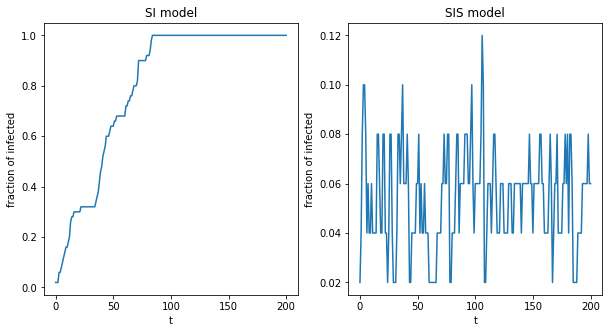

In [56]:
#SI model:
p_I = 0.1
n_iter = 200

#Initially there are no infected
I = set()
S = set(G.nodes())

#Random selection of the first infected person
patient0 = np.random.choice(list(S))
#Patient 0 is added to the infected people and removed from the susceptibles
I.add(patient0)
S.remove(patient0)

#Adapted: 
N = len(S|I)
I_N = []
I_N.append(1/N)

#time t passes
for t in range(n_iter):
    for infected_node in list(I):
        #the neighbors of the infected are selected 
        neighbors = G.neighbors(infected_node)
        #a random number of neighbors is infected
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        #the newly infected are added to the set of infected and removed from the susceptible compartment
        I |= infected_neighbors
        S -= infected_neighbors
    #I add the fraction of infected to the list of infected
    I_N.append(len(I)/N)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(I_N)

#It makes sense that after the code all nodes are infected. As t passes more nodes are infected and infecting the neighbors. The number of infected is increasing exponentially. 

#SIS model
#Unelegant adaption of the solution in the writeup 
p_I = 0.1
T_I = 10
n_iter = 200

#Initially there are no infected
I = set()
S = set(G.nodes())
#Random selection of the first infected person
patient0 = np.random.choice(list(S))
#Patient 0 is added to the infected people and removed from the susceptibles
I.add(patient0)
S.remove(patient0)

#Adapted: 
N = len(S|I)
I_N = []
I_N.append(1/N)

inf = [set()]*T_I
 
#time t passes
for t in range(n_iter):
    for infected_node in list(I):
        #the neighbors of the infected are selected 
        neighbors = G.neighbors(infected_node)
        #a random number of neighbors is infected
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        
        if len(inf) < T_I:
            #newly infected: infected_neighbors-I
            inf.insert(0, infected_neighbors-I)
        else: 
            inf = inf[:-1]
            inf.insert(0, infected_neighbors-I)
        recoveries = inf.pop()

        I |= infected_neighbors
        S -= infected_neighbors

        if recoveries is not None: 
            S |= recoveries
            I -= recoveries
    #I add the fraction of infected to the list of infected
    I_N.append(len(I)/N)

ax[1].plot(I_N)
ax[0].set_title("SI model")
ax[1].set_title("SIS model")
ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("fraction of infected")
ax[1].set_ylabel("fraction of infected")

#I'm not sure my result is entirely correct. I would still expect an upward trend. However, since people are able to recover, the curve wouldn't approach 1. 

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

Text(0.5, 0.98, 'p_I = 0.1, p_R = 0.01, p_S = 0.08')

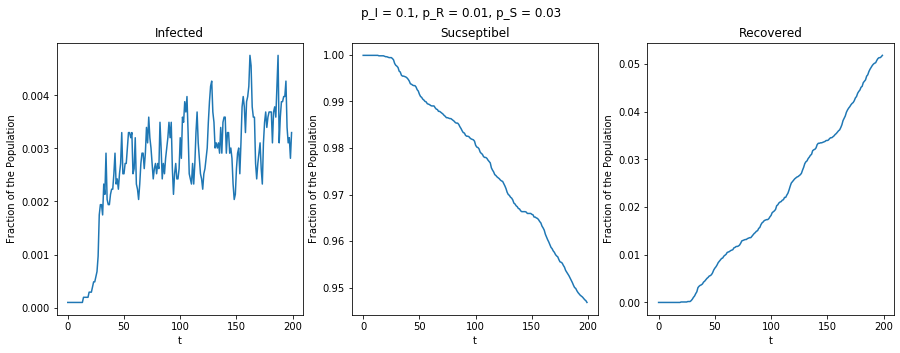

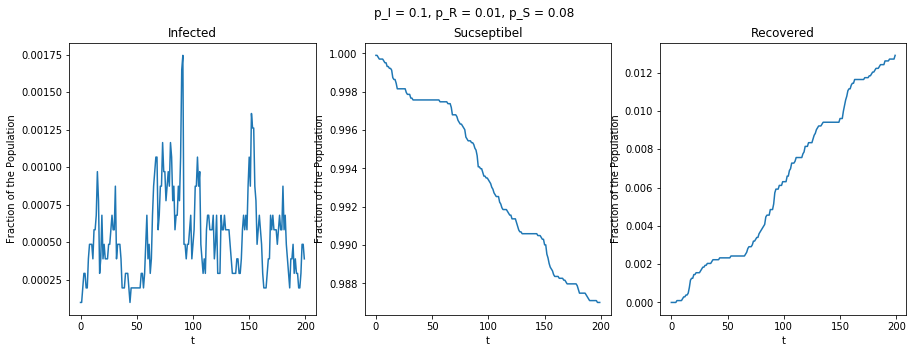

In [76]:
#SIRS model:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)
def slice(t0,t1):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]
    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')
    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight')
    return G_t

#I will only use a week slice to minimize computation time
t0 = data.timestamp.max() - 86400 * 7
t1 = data.timestamp.max() 
G_7 = slice(t0,t1)

def SIRS(p_I,p_R, p_S, G):
    #Arbitrarily selected parameters
    p_I = p_I
    p_R = p_R
    p_S = p_S
    G = G
    n_iter = 200

    #Initially there are no infected and no recovered
    I = set()
    R = set()
    S = set(G.nodes())

    #Random selection of the first infected person
    patient0 = np.random.choice(list(S))
    #Patient 0 is added to the infected people and removed from the susceptibles
    I.add(patient0)
    S.remove(patient0)

    #Adapted: 
    N = len(S|I)
    I_N = []
    S_N = []
    R_N = []

    #time t passes
    for t in range(n_iter):
        for infected_node in list(I): 
            #Getting all neighbors of infected
            neighbors = G.neighbors(infected_node)
            #Infecting neighbors
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
            #Selecting the recovered
            recovered = set([n for n in I if np.random.random() < p_R])
            #Selecting the nodes that lost immunity
            newly_susceptible = set([n for n in S if np.random.random() < p_I])
            
            #Movements
            S |= newly_susceptible
            I |= infected_neighbors
            R |= recovered
            
            S -= infected_neighbors
            I -= recovered
            R -= newly_susceptible
            
        #I add the fraction of infected to the list of infected
        I_N.append(len(I)/N)
        S_N.append(len(S)/N)
        R_N.append(len(R)/N)
    return [I_N, S_N, R_N]

fractions=SIRS(0.1,0.01,0.03,G_7)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(fractions[0])
ax[1].plot(fractions[1])
ax[2].plot(fractions[2])
ax[0].set_title('Infected')
ax[1].set_title('Sucseptibel')
ax[2].set_title('Recovered')
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[2].set_xlabel('t')
ax[0].set_ylabel('Fraction of the Population')
ax[1].set_ylabel('Fraction of the Population')
ax[2].set_ylabel('Fraction of the Population')
fig.suptitle('p_I = 0.1, p_R = 0.01, p_S = 0.03') 

fractions=SIRS(0.1,0.01,0.08,G_7)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(fractions[0])
ax[1].plot(fractions[1])
ax[2].plot(fractions[2])
ax[0].set_title('Infected')
ax[1].set_title('Sucseptibel')
ax[2].set_title('Recovered')
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[2].set_xlabel('t')
ax[0].set_ylabel('Fraction of the Population')
ax[1].set_ylabel('Fraction of the Population')
ax[2].set_ylabel('Fraction of the Population')
fig.suptitle('p_I = 0.1, p_R = 0.01, p_S = 0.08') 

#As can be seen from playing around with the parameters, the relative size of the parameters is deceisive for the dynamics of the disease. If the recovery rate is high relative to the rate of immunity loss and infection, infections will be low. However, the recovery effect is easily overpowered by high immunity loss and infection risk.   

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.